In [206]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub
import PIL.Image as Image
import pathlib
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [162]:
root='E:\Ali\Machine Learning\Datasets\Image Datasets'
fnames=os.listdir(root)

In [163]:
for i in range(len(fnames)):
    a=os.path.join(root,fnames[i])

In [164]:
data_dir=pathlib.Path(a)
data_dir

WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images")

In [165]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Cats/001.jpg"),
 WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Cats/004.jpg"),
 WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Cats/006.jpg"),
 WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Cats/007.jpg"),
 WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Cats/009.jpg")]

In [166]:
len(list(data_dir.glob('*/*.jpg')))

823

In [167]:
cats=list(data_dir.glob('Cats/*'))
cats[:5]

[WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Cats/001.jpg"),
 WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Cats/004.jpg"),
 WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Cats/006.jpg"),
 WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Cats/007.jpg"),
 WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Cats/009.jpg")]

In [168]:
dogs=list(data_dir.glob('Dogs/*'))
dogs[:5]

[WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Dogs/001.jpg"),
 WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Dogs/002.jpg"),
 WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Dogs/003.jpg"),
 WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Dogs/004.jpg"),
 WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Dogs/006.jpg")]

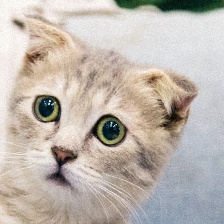

In [169]:
Image.open(str(cats[0]))

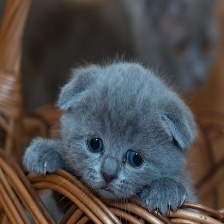

In [170]:
Image.open(cats[1])

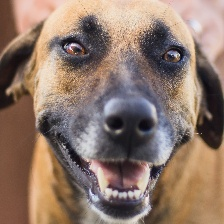

In [171]:
Image.open(dogs[0])

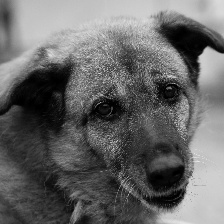

In [172]:
Image.open(dogs[1])

In [173]:
animal_images_dict={
    'Cats':list(data_dir.glob('Cats/*')),
    'Dogs':list(data_dir.glob('Dogs/*')),
    'Hamsters':list(data_dir.glob('Hamsters/*')),
    'Rabits':list(data_dir.glob('Rabits/*')),
    'Sheep':list(data_dir.glob('Sheep/*'))
}

In [174]:
animal_images_dict['Hamsters'][:5]

[WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Hamsters/044.jpg"),
 WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Hamsters/092.jpg"),
 WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Hamsters/25.jpg"),
 WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Hamsters/55.jpg"),
 WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Hamsters/aug-115-044.jpg")]

In [175]:
animal_images_dict['Rabits'][:5]

[WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Rabits/002.jpg"),
 WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Rabits/012.jpg"),
 WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Rabits/057.jpg"),
 WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Rabits/059.jpg"),
 WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Rabits/080.jpg")]

In [176]:
animal_images_dict['Sheep'][:5]

[WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Sheep/076.jpg"),
 WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Sheep/078.jpg"),
 WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Sheep/092.jpg"),
 WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Sheep/281-2814952_farm-animal-medicine-flock-of-sheep-png-transparent.png"),
 WindowsPath("E:/Ali/Machine Learning/Datasets/Image Datasets/Pet's Images/Sheep/72.jpg")]

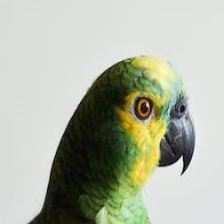

In [177]:
Image.open(str(animal_images_dict['Hamsters'][0]))

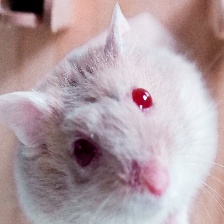

In [178]:
Image.open(str(animal_images_dict['Rabits'][0]))

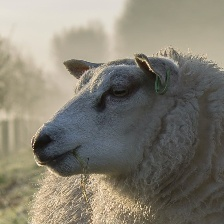

In [179]:
Image.open(str(animal_images_dict['Sheep'][0]))

In [180]:
animal_labels_dict={
    'Cats':0,
    'Dogs':1,
    'Hamsters':2,
    'Rabits':3,
    'Sheep':4
}

In [181]:
animal_labels_dict['Cats']

0

In [182]:
animal_labels_dict['Hamsters']

2

In [183]:
animal_labels_dict['Sheep']

4

In [184]:
for animal_names,images in animal_images_dict.items():
    print(animal_names)
    print(len(images))

Cats
286
Dogs
426
Hamsters
13
Rabits
74
Sheep
26


In [185]:
X,y=[],[]

for animal_names,images in animal_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(animal_labels_dict[animal_names])

In [186]:
X[0]

array([[[236, 241, 244],
        [236, 241, 244],
        [238, 243, 246],
        ...,
        [ 39,  63,  31],
        [ 55,  78,  50],
        [ 56,  79,  51]],

       [[238, 243, 246],
        [242, 247, 250],
        [238, 243, 246],
        ...,
        [ 44,  68,  36],
        [ 40,  64,  34],
        [ 60,  84,  54]],

       [[244, 249, 252],
        [228, 233, 236],
        [237, 242, 245],
        ...,
        [ 35,  59,  27],
        [ 54,  77,  45],
        [ 57,  80,  48]],

       ...,

       [[190, 203, 219],
        [187, 200, 216],
        [207, 220, 236],
        ...,
        [170, 153, 140],
        [156, 140, 124],
        [167, 151, 135]],

       [[187, 201, 219],
        [189, 204, 220],
        [193, 208, 224],
        ...,
        [154, 138, 122],
        [165, 146, 131],
        [176, 157, 142]],

       [[188, 204, 221],
        [186, 202, 219],
        [195, 210, 226],
        ...,
        [165, 149, 133],
        [166, 147, 132],
        [179, 160, 145]]

In [187]:
y[:5]

[0, 0, 0, 0, 0]

In [188]:
y[400:405]

[1, 1, 1, 1, 1]

In [189]:
X=np.array(X)
y=np.array(y)

In [190]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [191]:
X_train.shape

(660, 224, 224, 3)

In [192]:
X_test.shape

(165, 224, 224, 3)

In [193]:
X_train[0]

array([[[144, 163, 148],
        [143, 162, 147],
        [142, 161, 146],
        ...,
        [110, 135, 116],
        [109, 136, 116],
        [109, 136, 116]],

       [[144, 163, 148],
        [143, 162, 147],
        [142, 161, 146],
        ...,
        [109, 134, 115],
        [108, 134, 114],
        [108, 134, 114]],

       [[143, 162, 147],
        [143, 162, 147],
        [142, 162, 147],
        ...,
        [109, 134, 115],
        [108, 134, 114],
        [108, 134, 114]],

       ...,

       [[122, 178, 129],
        [120, 176, 127],
        [120, 175, 126],
        ...,
        [203, 202, 198],
        [206, 205, 202],
        [210, 208, 207]],

       [[121, 178, 129],
        [120, 176, 127],
        [119, 175, 126],
        ...,
        [203, 202, 198],
        [207, 206, 203],
        [212, 210, 209]],

       [[121, 177, 128],
        [120, 175, 126],
        [119, 174, 125],
        ...,
        [202, 201, 197],
        [208, 206, 203],
        [214, 212, 211]]

In [194]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [195]:
X_train_scaled[0]

array([[[0.56470588, 0.63921569, 0.58039216],
        [0.56078431, 0.63529412, 0.57647059],
        [0.55686275, 0.63137255, 0.57254902],
        ...,
        [0.43137255, 0.52941176, 0.45490196],
        [0.42745098, 0.53333333, 0.45490196],
        [0.42745098, 0.53333333, 0.45490196]],

       [[0.56470588, 0.63921569, 0.58039216],
        [0.56078431, 0.63529412, 0.57647059],
        [0.55686275, 0.63137255, 0.57254902],
        ...,
        [0.42745098, 0.5254902 , 0.45098039],
        [0.42352941, 0.5254902 , 0.44705882],
        [0.42352941, 0.5254902 , 0.44705882]],

       [[0.56078431, 0.63529412, 0.57647059],
        [0.56078431, 0.63529412, 0.57647059],
        [0.55686275, 0.63529412, 0.57647059],
        ...,
        [0.42745098, 0.5254902 , 0.45098039],
        [0.42352941, 0.5254902 , 0.44705882],
        [0.42352941, 0.5254902 , 0.44705882]],

       ...,

       [[0.47843137, 0.69803922, 0.50588235],
        [0.47058824, 0.69019608, 0.49803922],
        [0.47058824, 0

In [196]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(224,224,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

In [197]:
model=Sequential([
    data_augmentation,
    layers.Conv2D(100,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(85,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(70,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(55,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(40,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(200,activation='relu'),
    layers.Dense(150,activation='relu'),
    layers.Dense(100,activation='relu'),
    layers.Dense(5,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
21/21 [==============================] - 159s 7s/step - loss: 1.1572 - accuracy: 0.4894
Epoch 2/50
21/21 [==============================] - 133s 6s/step - loss: 1.0943 - accuracy: 0.5136
Epoch 3/50
21/21 [==============================] - 135s 6s/step - loss: 1.0603 - accuracy: 0.5364
Epoch 4/50
21/21 [==============================] - 137s 6s/step - loss: 1.0642 - accuracy: 0.5515
Epoch 5/50
21/21 [==============================] - 134s 6s/step - loss: 1.0219 - accuracy: 0.5818
Epoch 6/50
21/21 [==============================] - 133s 6s/step - loss: 1.0083 - accuracy: 0.5909
Epoch 7/50
21/21 [==============================] - 134s 6s/step - loss: 0.9733 - accuracy: 0.6061
Epoch 8/50
21/21 [==============================] - 119s 6s/step - loss: 0.9425 - accuracy: 0.6167
Epoch 9/50
21/21 [==============================] - 133s 6s/step - loss: 0.9248 - accuracy: 0.6136
Epoch 10/50
21/21 [==============================] - 120s 6s/step - loss: 0.8810 - accuracy: 0.6348
Epoch 11/

In [198]:
model.evaluate(X_test_scaled,y_test)

6/6 [==============================] - 15s 1s/step - loss: 0.8559 - accuracy: 0.8545


[0.855851411819458, 0.8545454740524292]

In [199]:
y_pred=model.predict(X_test_scaled)
y_pred[:5]

6/6 [==============================] - 9s 1s/step


array([[1.4078597e-04, 5.4091954e-01, 4.5893741e-01, 1.3033915e-06,
        9.7741361e-07],
       [9.8481166e-01, 1.4504494e-02, 8.2666647e-09, 6.7088957e-04,
        1.2946270e-05],
       [9.9700326e-01, 2.2177359e-03, 1.3772085e-06, 7.7006698e-04,
        7.5174066e-06],
       [6.8498647e-01, 3.1367201e-01, 3.3411249e-07, 1.3377654e-03,
        3.4266275e-06],
       [9.9999988e-01, 1.6261586e-07, 1.4813113e-10, 1.5116920e-10,
        4.3607284e-11]], dtype=float32)

In [200]:
y_predicted=[np.argmax(i) for i in y_pred]
y_predicted[:5]

[1, 0, 0, 0, 0]

In [201]:
y_test[:5]

array([1, 0, 0, 0, 0])

In [203]:
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88        44
           1       0.98      0.81      0.89       101
           2       0.25      1.00      0.40         1
           3       0.87      0.76      0.81        17
           4       0.25      1.00      0.40         2

    accuracy                           0.85       165
   macro avg       0.63      0.91      0.68       165
weighted avg       0.90      0.85      0.87       165



In [204]:
print(confusion_matrix(y_predicted,y_test))

[[43  1  0  0  0]
 [11 82  3  2  3]
 [ 0  0  1  0  0]
 [ 0  1  0 13  3]
 [ 0  0  0  0  2]]


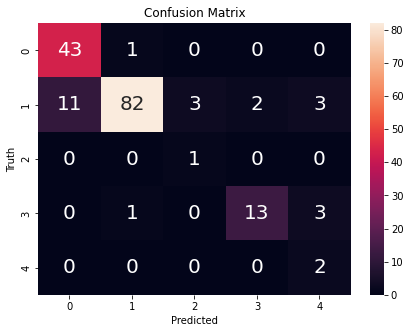

In [208]:
cm=confusion_matrix(y_predicted,y_test)
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True,annot_kws={'size':20},fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()